### Prolongement innabouti faute de données

In [36]:
accident_velo = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3d5f2317-5afd-4a9f-a9c5-bd4fe0113f39')
accident_velo_idf = accident_velo[accident_velo['departement'].isin(['75','77','78','91','92','93','94','95'])]
# Il y a un problème avec les latitudes et les longitudes nulles et les quelques erreurs

C:\Users\Vinciane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
accident_velo_idf_meteo = accident_velo_idf[['identifiant accident','date','mois', 'jour', 'heure', 'departement','luminosite', 'conditions atmosperiques', 'etat surface', 'sexe', 'age', 'gravite accident', 'commune', ]]
accident_velo_idf_meteo

,identifiant accident,date,mois,jour,heure,departement,luminosite,conditions atmosperiques,etat surface,sexe,age,gravite accident,commune
58,200500001606,2005-01-13,01 - janvier,3 - jeudi,11.0,78,Plein jour,Normale,normale,M,61-62,2 - Blessé hospitalisé,78230
61,200500001930,2005-01-15,01 - janvier,5 - samedi,15.0,95,Plein jour,Normale,normale,M,58-59,0 - Indemne,95042
221,200500004591,2005-01-04,01 - janvier,1 - mardi,17.0,75,Nuit avec éclairage public allumé,Normale,normale,M,36-37,1 - Blessé léger,75001
222,200500004597,2005-01-03,01 - janvier,0 - lundi,9.0,75,Plein jour,Normale,normale,M,26-27,0 - Indemne,75005
223,200500004600,2005-01-03,01 - janvier,0 - lundi,17.0,75,Nuit avec éclairage public allumé,Normale,normale,M,31-32,0 - Indemne,75019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,201800050291,2018-07-10,07 - juillet,1 - mardi,9.0,75,Plein jour,Normale,normale,F,58-59,2 - Blessé hospitalisé,75101
65532,201800050337,2018-11-17,11 - novembre,5 - samedi,12.0,75,Plein jour,Normale,normale,M,59-60,1 - Blessé léger,75101
65533,201800050355,2018-02-01,02 - février,3 - jeudi,15.0,75,Plein jour,Temps couvert,mouillée,M,31-32,1 - Blessé léger,75102
65534,201800050359,2018-02-12,02 - février,0 - lundi,9.0,75,Plein jour,Normale,normale,F,29-30,1 - Blessé léger,75101


D'après ce site, on a  https://www.iau-idf.fr/fileadmin/NewEtudes/Etude_1120/40ansEvolutionVelo.pdf

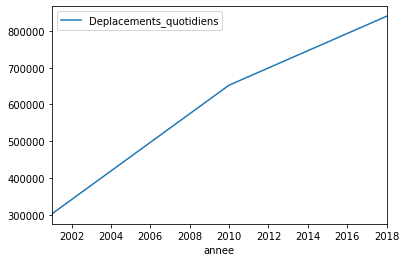

In [32]:
annee =[2001, 2010, 2018]
Deplacements_quotidiens= [302219, 652496,840000]
d = {'annee': annee, 'Deplacements_quotidiens': Deplacements_quotidiens}
df = pd.DataFrame(data=d)
df.plot('annee')
#Rajouter titre

In [33]:
from datetime import date
l = []
for i in range (2005,2018):
    d0 = date(i, 1, 1)
    d1 = date(i+1,12, 31)
    delta = d1 - d0
    nb_deplacement_an = delta.days*np.interp(i, annee, Deplacements_quotidiens)
    l.append(nb_deplacement_an)
nb_deplacement_total = sum(l) #Nombre  total de trajet parcourus
nb_deplacement_total

6240583002.666666

In [35]:
#Nombre d'accident par rapport au total des déplacements entre 2005 et 2018
#Fréquence d'un accident
len(accident_velo_idf)/nb_deplacement_total 


2.8107950799636104e-06

Réflexion sur les clusters, autre méthode :


Aller voir sur le site : https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1
autre site : https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
autre site utile : https://medium.com/datadriveninvestor/weighted-k-means-clustering-of-gps-coordinates-python-7c6270846163

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [ ]:
K_clusters = range(10,100)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = gdf[['lat']]
X_axis = gdf[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#on définit pour la suite le nombre de clusters qu'on souhaite
k =30

In [ ]:
X=gdf.loc[:,['identifiant accident','lat','lon']]

In [ ]:
kmeans = KMeans(n_clusters = k, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.sort_values(by = 'lat').head(10)

In [ ]:
plt.scatter(x = X.lat, y = X.lon, s=1, c=labels,cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha =0.5, c='black')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [ ]:
model = cluster.AffinityPropagation()
k = X["cluster_label"].nunique()

In [ ]:
sns.scatterplot(x= X.lat, y=X.lon, 
                palette=sns.color_palette("bright", k),
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [ ]:
X = X[['identifiant accident','cluster_label']]
X.head(5)

In [ ]:
clustered_data = gdf.merge(X, left_on='identifiant accident', right_on='identifiant accident')
clustered_data.head(5)

Cluster avec la méthode DBSCAn, pour trouver le epsilon

In [ ]:
X=gdf.loc[:,['lat','lon']]
#X
#gdf
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
neigh = NearestNeighbors(n_neighbors=2) # à vérifier
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1] # On fit avec le training set donc le plus proche voisin est lui-même
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.axvline(x=(0.9)*3462, c ='red')
plt.axhline(y=0.01, c= 'pink')
plt.show()
#Comme nous l’avons vu précédemment nous allons choisir un ε de tel sorte que 90% des observations aient une distance au proche voisin inférieure à ε. 
#je fais 0.9*3600 données = 3200, on voit pour 3200 epsilon environ = 0.01
#Sauf que, nous on ne cherche pas le nombre de cluster optimal de cette façon, on préfère le faire de manière géographique

In [ ]:
from sklearn.cluster import DBSCAN
kms_per_radian = 6371 
epsilon = 0.05/kms_per_radian 
db2 = DBSCAN(eps = epsilon, min_samples=3).fit_predict(X)
plt.scatter(gdf['lat'],gdf['lon'],c = db2);